# DS特論10 第3回課題レポート

提出期限:2020年12月15日  

所属:人間情報科学コース  
学籍番号: 6612200006-1   
氏名: 浮田 凌佑  









## Dataset の扱い

In [1]:
from sklearn.datasets import load_iris
from sklearn import datasets

import pandas as pd
import numpy as np
from tqdm import tqdm as tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#Gaussian Naive Bayes のためのコード
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [2]:
#Iris Datasetを読み込み
iris = datasets.load_iris()

In [20]:
#あやめのデータ（説明変数）をDataFrameでdataXに格納する
dataX = pd.DataFrame(data=iris.data,columns=iris.feature_names)
dataX.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
#あやめのデータ（目的変数）をDataFrameでdataYに格納する
dataY = pd.DataFrame(data=iris.target)
dataY = dataY.rename(columns={0: 'Species'})
dataY.head()

,Species
0,0
1,0
2,0
3,0
4,0


### 冒頭のみの表示

In [22]:
#あやめのデータ(全体)
iris_df = pd.concat([dataX, dataY], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


-  
-  
-  
-  
-  
-  
-  
-  
-  
-

### データ基礎集計

データ数(150件)

In [23]:
#irisデータのデータ数, 欠損値や型を確認
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [24]:
#データの平均, 標準偏差, 最大値, 最小値などを集計
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


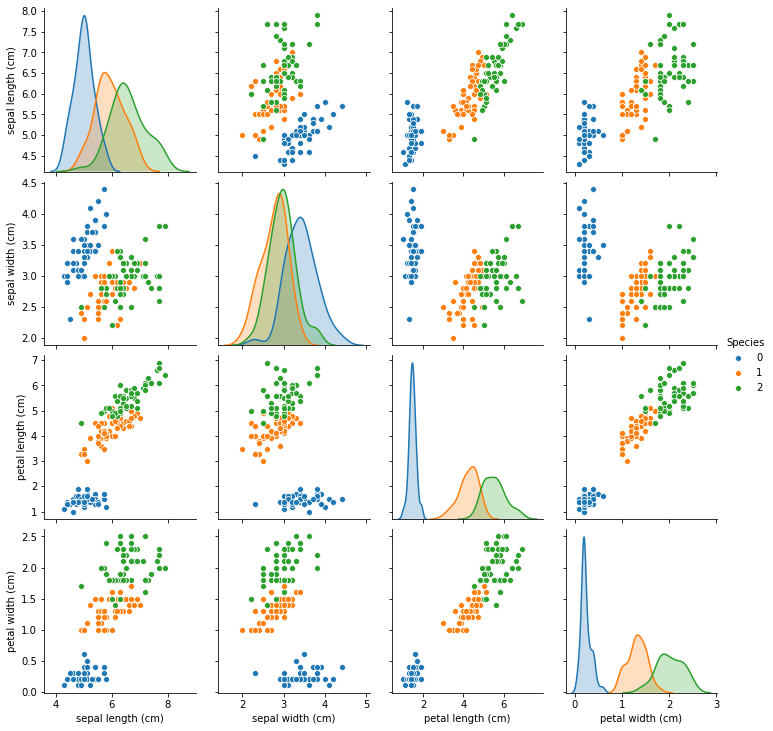

In [25]:
# 散布図行列を書いてみる
sns.pairplot(iris_df, hue='Species')

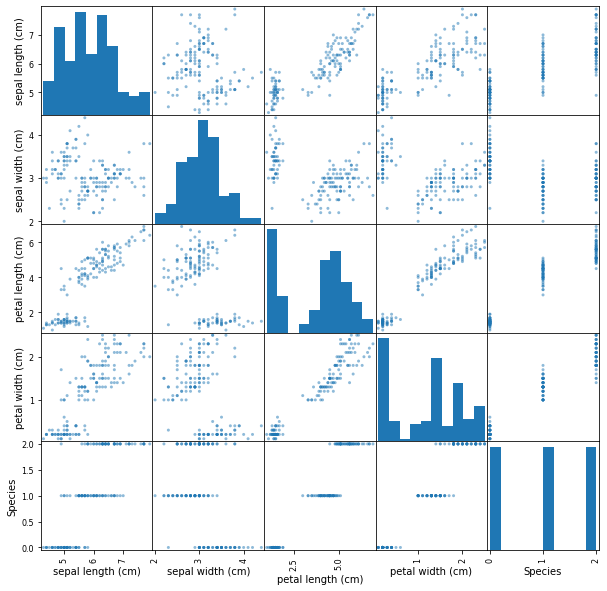

In [26]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(iris_df, figsize=(10,10))
plt.show()

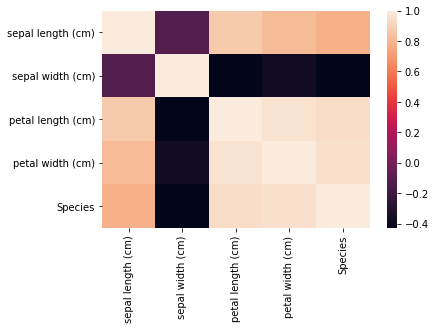

In [27]:
# 相関係数をヒートマップにして可視化
sns.heatmap(iris_df.corr())
plt.show()

In [28]:
# 相関係数を確認
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


### Irisのデータを80%を学習データに, 20%を実験データとする

In [29]:
X = dataX.values
y = dataY.values
#y = y.reshape(-1,)
#データの分割
#目的変数0~2が均等になるようにstratifyを指定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (120, 4)
y_train.shape =  (120, 1)
X_test.shape =  (30, 4)
y_test.shape =  (30, 1)


## 設問①:学習データについて Species を目的変数, 他の4変数を説明変数として判別関数を決定しなさい.

[設問の補足]  
ナイーブベイズ分類器を用いて, 問題を実施する  
学習データの判別を行うことによって設問①の回答とする

In [30]:
#インスタンスの作成
#特徴量に正規分布（連続値データ）を仮定する場合に使用
model = GaussianNB()

#学習データで学習
model.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

-  
-  
-  
-  
-  
-  
-  
-  
-  
-

### 学習済みのナイーブベイズ分類器を使って, 学習データの判別

In [31]:
predict_train = model.predict(X_train)
compare = predict_train == y_train.reshape(-1)

print(f'correct: {compare.sum()} / {len(predict_train)}')
for value, label in zip(predict_train, y_train):
    print('predicted:', iris.target_names[value.item()], '<--->','label:', iris.target_names[int(label.item())])

correct: 114 / 120
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: virgin

In [32]:
#学習データを使って, 学習済みモデルで予測
# 予測、精度
print('学習データ精度 = {:.2f}％'.format(model.score(X_train, y_train)*100))

学習データ精度 = 95.00％


・これらの結果から学習データで95%予測できる判別関数が決定されていることがわかる

## 設問②:判別関数を実験データの判別に適応しなさい(+判別精度計算).

In [33]:
predict_test = model.predict(X_test)
compare_test = predict_test == y_test.reshape(-1)

print(f'correct: {compare_test.sum()} / {len(predict_test)}')
for value, label in zip(predict_test, y_test):
    print('predicted:', iris.target_names[value.item()], '<--->','label:', iris.target_names[int(label.item())])

correct: 29 / 30
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: virginica
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virgin

In [34]:
#実験用データを使って, 学習済みモデルで予測
# 予測、精度
print('判別精度 = {:.2f}％'.format(model.score(X_test, y_test)*100))

判別精度 = 96.67％


・これらの結果から実験データも同様に予測できる判別関数が決定されていることがわかる

・判別精度は96.67%達成されていることがわかる

## 考察と感想

### 考察①:ナイーブベイズの汎用性

In [35]:
from sklearn.metrics import accuracy_score

#分類結果
acc_train = accuracy_score(y_train, predict_train)
acc_test = accuracy_score(y_test, predict_test)
print(f'学習データの正解数: {compare.sum()} / {len(predict_train)}')
print('学習データの正解率：{:.1f}%'.format(acc_train*100))
print(f'実験データの正解数: {compare_test.sum()} / {len(predict_test)}')
print('実験データの正解率：{:.1f}%'.format(acc_test*100))

学習データの正解数: 114 / 120
学習データの正解率：95.0%
実験データの正解数: 29 / 30
実験データの正解率：96.7%


学習データでは, 120個の実験用データのうち,114個の正解で, 正解率は95.0%であることがわかった.
実験データでは, 30個の実験用データのうち,29個の正解で, 正解率は96.7%であることがわかった.
これらの結果から, 学習データ以外のデータが入力されても, それがどんな品種のあやめなのかをある程度は正しく判断できることが確認できた. そのため, ナイーブベイズは, 汎用的であることがわかった.

しかし, 100%の正解率ではないことから, どんなデータに対しても必ず正しく予測できるとは限らないことが見て取れる.

-  
-  
-  
-  
-  
-  
- 
-  
-  

### 考察②:種別(3種類)ごとの正解率

種別(3種類)ごとの正解率を確認するため, 混同行列を用いて, データ全体の予測値と正解のクロス集計を行った

In [36]:
from sklearn.metrics import confusion_matrix
# 予測値と正解のクロス集計（混同行列）
y_pred = model.predict(dataX)
conf_mat = confusion_matrix(dataY, y_pred)

conf_mat = pd.DataFrame(conf_mat, 
                        index=['正解 = setosa', '正解 = versicolor', '正解 = virginica'], 
                        columns=['予測 = setosa', '予測 = versicolor', '予測 = virginica'])
conf_mat

,予測 = setosa,予測 = versicolor,予測 = virginica
正解 = setosa,50,0,0
正解 = versicolor,0,47,3
正解 = virginica,0,4,46


混同行列の結果から, setosaは予測できていることがわかる一方, versicolor, virginicaの判別は難しいとこがわかる.

そこで, もう一度データを確認するため, 散布図行列を再掲する

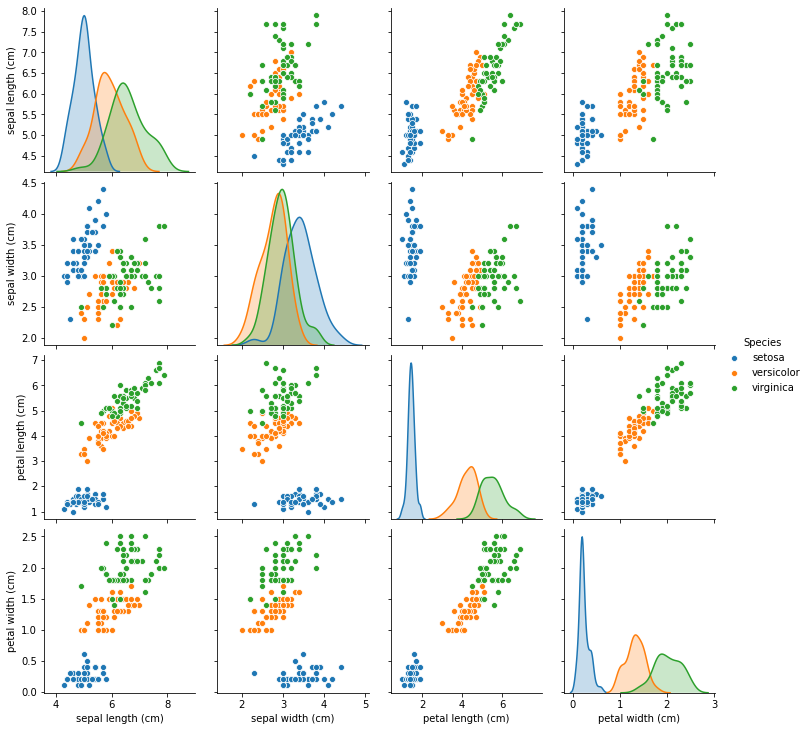

In [37]:
iris_df.loc[iris_df['Species'] == 0, 'Species'] = "setosa"
iris_df.loc[iris_df['Species'] == 1, 'Species'] = "versicolor"
iris_df.loc[iris_df['Species'] == 2, 'Species'] = "virginica"
sns.pairplot(iris_df, hue='Species')

散布図から, setosa(青色)は, 花弁の⻑さ((Petal Length)や花弁の幅(Petal Width)だけでも, 分類が容易であることがわかる一方, versicolor(オレンジ), virginica(緑)は, 重なっている部分が多く, 分離が難しいことがわかる

### 考察③:ナイーブベイズの判別方法の確認

ナイーブベイズを用いた判別は, それぞれのクラスに属する確率を計算し, 確率が最も大きいクラスにそのサンプルを分類することで判別する.  
そのため, それぞれのクラスに属する確率をそれぞれ出すことで, ナイーブベイズの分類過程が確認できると考えた

In [77]:
predict_train_df = pd.concat([pd.DataFrame(X_train, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']), pd.Series(predict_train, name="predict")], axis=1)
# 学習データを用いた各クラスの確率
predict_proba_train = model.predict_proba(X_train)
A = pd.concat([predict_train_df, pd.DataFrame(predict_proba_train, columns=['setosaの確率','versicolorの確率', 'virginicaの確率'])], axis=1)

In [78]:
predict_test_df = pd.concat([pd.DataFrame(X_test, columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']), pd.Series(predict_test, name="predict")], axis=1)
# 実験データを用いた各クラスの確率
predict_proba_test = model.predict_proba(X_test)
B = pd.concat([predict_test_df, pd.DataFrame(predict_proba_test, columns=['setosaの確率','versicolorの確率', 'virginicaの確率'])], axis=1)

In [83]:
#あやめのデータに予測結果と各クラスの確率を追加(全体)
iris_predict_df = pd.concat([A, B]).reset_index()
iris_predict_df

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict,setosaの確率,versicolorの確率,virginicaの確率
0,0,4.8,3.0,1.4,0.3,0,1.000000e+00,2.969447e-15,2.350989e-24
1,1,4.9,3.0,1.4,0.2,0,1.000000e+00,2.702620e-16,2.218107e-25
2,2,4.4,3.0,1.3,0.2,0,1.000000e+00,3.240728e-17,2.662474e-26
3,3,5.0,3.4,1.5,0.2,0,1.000000e+00,1.243722e-16,2.896796e-25
4,4,5.8,2.7,3.9,1.2,1,2.439096e-61,9.999826e-01,1.739008e-05
...,...,...,...,...,...,...,...,...,...
145,25,6.7,3.1,4.7,1.5,1,1.804247e-108,8.068820e-01,1.931180e-01
146,26,5.7,2.8,4.1,1.3,1,4.063506e-72,9.998986e-01,1.014118e-04
147,27,6.3,3.3,6.0,2.5,2,1.512553e-244,3.521683e-10,1.000000e+00
148,28,5.1,3.5,1.4,0.2,0,1.000000e+00,3.067766e-17,8.761445e-26


In [85]:
iris_predict_df_copy = iris_predict_df.copy()
#新しく確率が最も大きいクラスの列を追加
iris_predict_df_copy['確率が最も大きいクラス'] = np.nan

#3つの各クラスの中で, 確率が最大の列名を"確率が最も大きいクラス"に追加
for i in range(len(iris_predict_df_copy)):
    iris_predict_df_copy['確率が最も大きいクラス'].iloc[i] = iris_predict_df_copy[['setosaの確率','versicolorの確率','virginicaの確率']].iloc[i].idxmax()

iris_predict_df_copy.loc[iris_predict_df_copy['確率が最も大きいクラス'] == 'setosaの確率', '確率が最も大きいクラス'] = 0
iris_predict_df_copy.loc[iris_predict_df_copy['確率が最も大きいクラス'] == 'versicolorの確率', '確率が最も大きいクラス'] = 1
iris_predict_df_copy.loc[iris_predict_df_copy['確率が最も大きいクラス'] == 'virginicaの確率', '確率が最も大きいクラス'] = 2
iris_predict_df_copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict,setosaの確率,versicolorの確率,virginicaの確率,確率が最も大きいクラス
0,0,4.8,3.0,1.4,0.3,0,1.000000e+00,2.969447e-15,2.350989e-24,0
1,1,4.9,3.0,1.4,0.2,0,1.000000e+00,2.702620e-16,2.218107e-25,0
2,2,4.4,3.0,1.3,0.2,0,1.000000e+00,3.240728e-17,2.662474e-26,0
3,3,5.0,3.4,1.5,0.2,0,1.000000e+00,1.243722e-16,2.896796e-25,0
4,4,5.8,2.7,3.9,1.2,1,2.439096e-61,9.999826e-01,1.739008e-05,1
...,...,...,...,...,...,...,...,...,...,...
145,25,6.7,3.1,4.7,1.5,1,1.804247e-108,8.068820e-01,1.931180e-01,1
146,26,5.7,2.8,4.1,1.3,1,4.063506e-72,9.998986e-01,1.014118e-04,1
147,27,6.3,3.3,6.0,2.5,2,1.512553e-244,3.521683e-10,1.000000e+00,2
148,28,5.1,3.5,1.4,0.2,0,1.000000e+00,3.067766e-17,8.761445e-26,0


In [86]:
#実際の予測クラスと, 確率が最も大きいクラスが一致しているか確認
compare_predict = iris_predict_df_copy['predict'] == iris_predict_df_copy['確率が最も大きいクラス']
print(f'correct: {compare_predict.sum()} / {len(compare_predict)}')

correct: 150 / 150


結果より, ナイーブベイズを用いた判別は, それぞれのクラスに属する確率を計算し, 確率が最も大きいクラスにそのサンプルを分類することで判別していることが確認できた.

### 感想

レポート2で用いた, ニューラルネットワークでのirisの判別より, 複雑なハイパーパラメータの調整は必要なく, 手軽にできると感じた.